# Simple Linear Regression Using PyTorch

### Importing important libraries

In [2]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn

### Creating a Tensor
X = torch.linspace(1,50,50) will create a tensor that will have 50 values and that will start from 1.0 to 50.0 and reshape(-1,1) will change the shape of the tensor to single column tensor as we are reshaping it (-1,1) i.e. irrespective of the 1st dimension, we need 2nd dimension should be 1.

In [3]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [10]:
torch.manual_seed(71)

e = torch.randint(-8,9,(50,1),dtype=torch.float)

In [11]:
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


In [12]:
y = 2*X + 1 + e

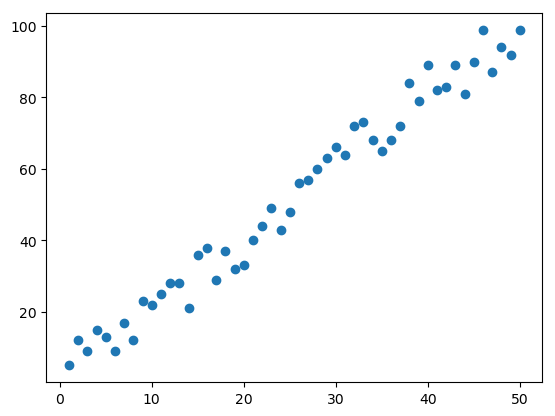

In [13]:
plt.scatter(X.numpy(),y.numpy())

In [15]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [16]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
        

In [17]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [21]:
for name,param in model.named_parameters():
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [22]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [23]:
x1 = torch.linspace(0.0, 50.0, 50)

In [24]:
print(x1)

tensor([ 0.0000,  1.0204,  2.0408,  3.0612,  4.0816,  5.1020,  6.1224,  7.1429,
         8.1633,  9.1837, 10.2041, 11.2245, 12.2449, 13.2653, 14.2857, 15.3061,
        16.3265, 17.3469, 18.3673, 19.3878, 20.4082, 21.4286, 22.4490, 23.4694,
        24.4898, 25.5102, 26.5306, 27.5510, 28.5714, 29.5918, 30.6122, 31.6327,
        32.6531, 33.6735, 34.6939, 35.7143, 36.7347, 37.7551, 38.7755, 39.7959,
        40.8163, 41.8367, 42.8571, 43.8776, 44.8980, 45.9184, 46.9388, 47.9592,
        48.9796, 50.0000])


In [25]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [26]:
y1

tensor([0.9637, 1.0718, 1.1798, 1.2879, 1.3959, 1.5040, 1.6121, 1.7201, 1.8282,
        1.9363, 2.0443, 2.1524, 2.2604, 2.3685, 2.4766, 2.5846, 2.6927, 2.8007,
        2.9088, 3.0169, 3.1249, 3.2330, 3.3410, 3.4491, 3.5572, 3.6652, 3.7733,
        3.8814, 3.9894, 4.0975, 4.2055, 4.3136, 4.4217, 4.5297, 4.6378, 4.7458,
        4.8539, 4.9620, 5.0700, 5.1781, 5.2861, 5.3942, 5.5023, 5.6103, 5.7184,
        5.8265, 5.9345, 6.0426, 6.1506, 6.2587])

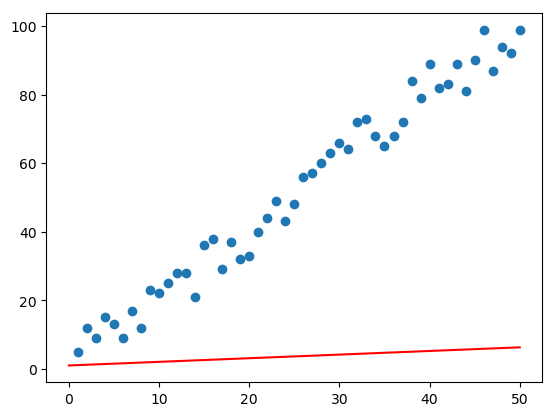

In [37]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1,'r')


In [29]:
criterion = nn.MSELoss()

In [30]:
optimizer = torch.optim.SGD(model.parameters(), lr= 0.001)

In [31]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    
    y_pred = model.forward(X)
    
    loss = criterion(y_pred,y)
    
    losses.append(loss)
    
    print(f"Epoch {i} Loss: {loss.item()}, weight: {model.linear.weight.item()}, bias: {model.linear.bias.item()}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

Epoch 1 Loss: 3057.216796875, weight: 0.10597813129425049, bias: 0.9637961387634277
Epoch 2 Loss: 1588.5311279296875, weight: 3.334900379180908, bias: 1.0604636669158936
Epoch 3 Loss: 830.2999877929688, weight: 1.0148327350616455, bias: 0.9922628402709961
Epoch 4 Loss: 438.8524169921875, weight: 2.6817996501922607, bias: 1.0425218343734741
Epoch 5 Loss: 236.7615203857422, weight: 1.4840211868286133, bias: 1.0076650381088257
Epoch 6 Loss: 132.4291229248047, weight: 2.3446059226989746, bias: 1.0339646339416504
Epoch 7 Loss: 78.56572723388672, weight: 1.7262253761291504, bias: 1.0163217782974243
Epoch 8 Loss: 50.75775909423828, weight: 2.170504093170166, bias: 1.0302516222000122
Epoch 9 Loss: 36.4012565612793, weight: 1.851245641708374, bias: 1.0214954614639282
Epoch 10 Loss: 28.989229202270508, weight: 2.0806007385253906, bias: 1.029038906097412
Epoch 11 Loss: 25.162382125854492, weight: 1.9157683849334717, bias: 1.0248701572418213
Epoch 12 Loss: 23.186473846435547, weight: 2.03416562080

Text(0.5, 0, 'Epochs')

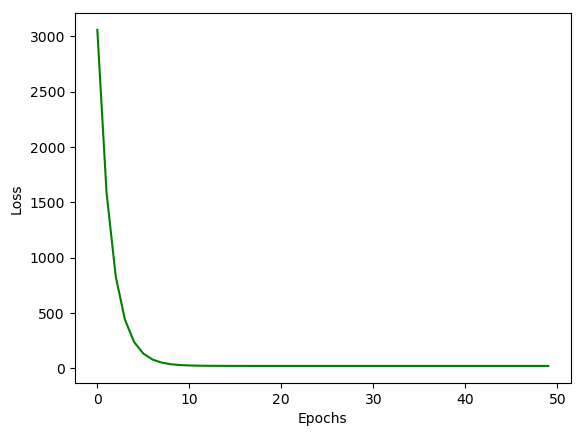

In [36]:
plt.plot(range(epochs),losses,'g')
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [33]:
x = torch.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x + current_bias

In [34]:
print(predicted_y)

tensor([  1.0558,   3.0801,   5.1044,   7.1287,   9.1530,  11.1773,  13.2016,
         15.2259,  17.2502,  19.2745,  21.2988,  23.3231,  25.3474,  27.3717,
         29.3960,  31.4203,  33.4446,  35.4689,  37.4932,  39.5176,  41.5419,
         43.5662,  45.5905,  47.6148,  49.6391,  51.6634,  53.6877,  55.7120,
         57.7363,  59.7606,  61.7849,  63.8092,  65.8335,  67.8578,  69.8821,
         71.9064,  73.9307,  75.9550,  77.9793,  80.0036,  82.0280,  84.0523,
         86.0766,  88.1009,  90.1252,  92.1495,  94.1738,  96.1981,  98.2224,
        100.2467])


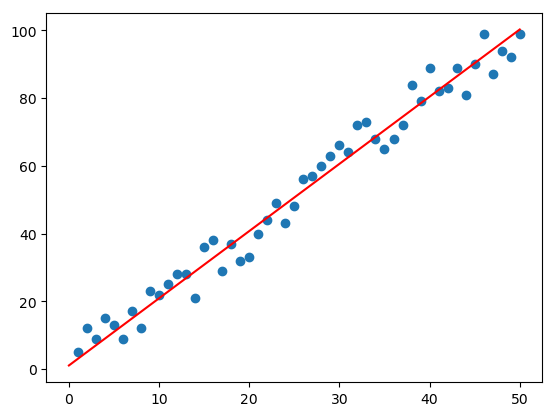

In [35]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')